# Semaine 13 - Reinforcement Learning, Q-learning

Dans l'exercice de cette semaine, nous utiliserons le module *Gym* d'OpenAI. Gym implémente divers environnements compatibles avec des problèmes de RL pour permettre à la communauté scientifique de s'y entraîner.

Voici le lien vers la documentation de *Gym*:   https://gym.openai.com/docs/

In [1]:
!pip install gym
import gym
from gym import wrappers
import numpy as np

# L'environnement

Dans MountainCar, il faire à apprendre au pilote de la voiture comment monter au sommet de la montagne. Mais le moteur n'a pas assez de puissance pour y arriver d'un coup.

In [2]:
env = gym.make('MountainCar-v0')
env.reset()
for timestep in range(200):
    env.render()
    env.step(2)
env.close()

Le pilote dispose de 3 actions possibles:

In [3]:
env.action_space.n

3

Testez différentes valeurs pour la variable "action" afin de découvrir comment est encodé le choix de l'action pour le passer à l'environnement au travers de la méthode step()

In [4]:
action = 2

env = gym.make('MountainCar-v0')
env.seed(42)
env.reset()
for timestep in range(200):
    env.render()
    env.step(action)
env.close()

# Les observations et les états

L'environnement fournit à l'agent deux valeurs continues comme observation:

In [5]:
env.observation_space

Box(2,)

Une des valeurs correspond à la position, l'autre à la vitesse

Les observations sont renvoyées par deux différentes méthodes de l'environnement:

In [6]:
observation = env.reset()
print(observation)
observation, reward, done, info = env.step(action)
print(observation)

[-0.50313229  0.        ]
[-0.50228569  0.0008466 ]


Pour faire du q-learning, il faut un nombre fini d'état, donc nos valeurs continues doivent devenir discrètes. Écrivez une fonction qui divise l'échelle de variation de chaque valeur en 20 segments égaux.

In [7]:
n_segments = 20

def obs_to_state(obs):
    min_position, min_speed = env.observation_space.low
    max_position, max_speed = env.observation_space.high
    position, speed = obs
    
    position_delta = (max_position - min_position) / n_segments
    speed_delta = (max_speed - min_speed) / n_segments
    position_segm = int((position-min_position)/position_delta)
    speed_segm = int((speed-min_speed)/speed_delta)
    
    state = position_segm, speed_segm
    return state

Testez votre fonction: Faites-lui transformer l'état renvoyé par env.reset()  

In [8]:
print(obs_to_state(env.reset()))

(8, 10)


# L'agent 

Par souci de simplicité, nous n'allons pas implémenter l'agent comme objet, mais néanmoins nous implémenterons sa Policy!

### Q-Table

Créez une table de q-valeurs qui peut contenir une q-valeur distincte pour chaque action possible, dans tous les états imaginables!

In [9]:
np.random.seed(42)

dimensions = (n_segments, n_segments, env.action_space.n) 
q_table = np.random.uniform(low=-1, high=1, size=dimensions)
print(q_table)

[[[-0.25091976  0.90142861  0.46398788]
  [ 0.19731697 -0.68796272 -0.68801096]
  [-0.88383278  0.73235229  0.20223002]
  ...
  [ 0.55026565  0.87899788  0.7896547 ]
  [ 0.19579996  0.84374847 -0.823015  ]
  [-0.60803428 -0.90954542 -0.34933934]]

 [[-0.22264542 -0.45730194  0.65747502]
  [-0.28649335 -0.43813098  0.08539217]
  [-0.71815155  0.60439396 -0.85089871]
  ...
  [-0.67755743  0.8593953   0.61624076]
  [ 0.26680751  0.74292118  0.60734415]
  [-0.62685988  0.785118    0.07868448]]

 [[ 0.61488031  0.7921826  -0.36399305]
  [-0.77989615 -0.54412967 -0.14578442]
  [ 0.63602953  0.72146117 -0.98609574]
  ...
  [-0.96682434  0.02418612 -0.54700845]
  [ 0.29034558 -0.65126714  0.38187548]
  [-0.22652931  0.87345998 -0.72495811]]

 ...

 [[ 0.39484053 -0.40530199  0.84879239]
  [ 0.94211649  0.88853298 -0.05157157]
  [ 0.7240853   0.6890988  -0.36179905]
  ...
  [-0.5327845  -0.91581362 -0.96425213]
  [ 0.97544478 -0.14445373 -0.23134671]
  [ 0.35929457 -0.56349222  0.89992237]]

 [

### Policy

Implémentez la Greedy policy, qui utilise la q_table pour décider de la meilleure action à choisir

In [10]:
def greedy_policy(state):
    action = np.argmax(q_table[state])
    
    return action

Implémentez maintenant la Epsilon-greedy policy, qui ajoute une probabilité *epsilon* que l'action soit choisie aléatoirement  
_**Indice:**_ np.random.choice(n) choisira aléatoirement un nombre de 0 à n exclus

In [11]:
def epsilon_greedy_policy(state, epsilon):
    if np.random.rand(1) < epsilon:
        action = np.random.choice(env.action_space.n)
    else:
        action = greedy_policy(state)
    return action

# L'entraînement

In [21]:
import pdb
import numpy as np
np.random.seed(42)

# Parameters
episodes_max = 5000
lr = 0.2
gamma = 1.1

# Epsilon will diminish over the episodes to increase exploitation
start_epsilon = 0.8
final_epsilon = 0
epsilon_reduction = (start_epsilon - final_epsilon) / episodes_max
epsilon = start_epsilon

reward_list = []
avg_reward_list = []

# Train for 'episodes_max' episodes
for episode in range(episodes_max):
    
    # Initialize parameters of the episode
    total_reward = 0
    done = False
    state1 = obs_to_state(env.reset())
    
    # Each episode runs for a maximum of 200 timesteps, at whith point the Environment returns done = True
    while done is False:
        
        # The agent chooses an action
        action = epsilon_greedy_policy(state1, epsilon)
        
        # The action is given to the environment, which returns a new state, a reward, and some other info
        # (see documentation https://gym.openai.com/docs/)
    
        observation, reward, done, info = env.step(action)
        state2 = obs_to_state(observation)
        
        total_reward += reward
        
        # Update q_table
        if done:
            """Quelle est la q-valeur de la toute dernière action???"""
            q_table[state1][action] = reward
        else:
            """Hmmmm... On dirait qu'on va s'amuser avec l'équation de Bellman!!"""
            q_table[state1][action] = (1 - lr) * q_table[state1][action] + lr * (reward + gamma * max(q_table[state2]))
        
        # The new state becomes state1 of the next loop
        state1 = state2
    
    # Epsilon decay
    epsilon -= epsilon_reduction
    
    # Display rewards
    reward_list.append(total_reward)
    if (episode + 1) % 100 == 0:
        avg_reward = np.mean(reward_list)
        avg_reward_list.append(avg_reward)
        reward_list = []
        print('Iteration #{} -- Average reward = {}'.format(episode+1, avg_reward))

Iteration #100 -- Average reward = -200.0
Iteration #200 -- Average reward = -200.0
Iteration #300 -- Average reward = -200.0
Iteration #400 -- Average reward = -200.0
Iteration #500 -- Average reward = -200.0
Iteration #600 -- Average reward = -200.0
Iteration #700 -- Average reward = -200.0
Iteration #800 -- Average reward = -200.0
Iteration #900 -- Average reward = -200.0
Iteration #1000 -- Average reward = -200.0
Iteration #1100 -- Average reward = -200.0
Iteration #1200 -- Average reward = -200.0
Iteration #1300 -- Average reward = -200.0
Iteration #1400 -- Average reward = -200.0
Iteration #1500 -- Average reward = -200.0
Iteration #1600 -- Average reward = -200.0
Iteration #1700 -- Average reward = -200.0
Iteration #1800 -- Average reward = -200.0
Iteration #1900 -- Average reward = -200.0
Iteration #2000 -- Average reward = -200.0
Iteration #2100 -- Average reward = -200.0
Iteration #2200 -- Average reward = -200.0
Iteration #2300 -- Average reward = -200.0
Iteration #2400 -- A

## La mise à l'épreuve 

On veut maintenant voir notre agent en action avec la Policy optimale. Quelle fonction utilisera-t-on pour sélectionner chaque action?

In [24]:
env = gym.make('MountainCar-v0')
state = obs_to_state(env.reset())
done = False
while done is False:
    env.render()
    action = greedy_policy(state)
    obs, reward, done, _ = env.step(action)
    state = obs_to_state(obs)
env.close()

## Évolution de l'entraînement

Un petit graphique pour voir l'évolution du Return moyen de chaque tranche de 100 épisodes

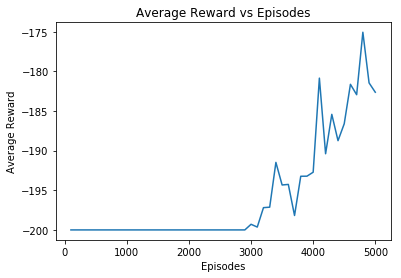

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(100*(np.arange(len(avg_reward_list)) + 1), avg_reward_list)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.show()